In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [3]:
data=pd.read_csv('Ecommerce')

In [4]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y= data['Yearly Amount Spent']

In [5]:
X_train=X.to_numpy()
y_train=y.to_numpy()

In [6]:
m,n =X_train.shape
print(m,n)

500 4


# Prediction

In [7]:
def prediction(X,w,b):
    product=np.dot(X,w)+b   #product is an array
    return product




def prediction2(X,w,b):
    result=np.array([])
    m,n=X.shape
    for i in range(m):
        product=np.dot(X[i],w)+b
        result=np.append(result,product)
    return result

# Cost function

# $$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \$$ 



m is the number of training examples. (rows)

 y^(i) is the predicted value for the  i-th training example.

y(i) is the actual value for the  i-th training example.

In [8]:
def cost2(X,y,w,b):
    product=np.dot(X,w)+b  #product is an array
    total=0
    m,_=X.shape
    for i in range(m):
        diff=(product[i]-y[i])**2
        total+=diff
    total_cost=total/(2*m)

    return total_cost



def cost(X, y, w, b):
    product = np.dot(X, w) + b  # product is an array
    m = len(y)  # Number of training examples
    total_cost = np.sum((product - y) ** 2) / (2 * m)
    return total_cost


# Compute Gradient

In [9]:
def compute_gradient(X, y, w, b): 
     
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [10]:
def gradient_descent(X, y, w_init,b_init, gradient_function, cost_function, alpha, num_iter):
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    b = b_init
    J_history=[]
    for i in range(num_iter):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db  
        
        
        if i<100000:
            J_history.append(cost_function(X,y,w,b))
            
    return w,b, J_history


In [11]:

w_init=np.zeros(n)
b_init=0
alpha=40.0e-5


w_final, b_final, cost_hist=gradient_descent(X_train, y_train, w_init,b_init, compute_gradient, cost, alpha, 10000)

In [12]:
print(w_final,b_final)

[ 11.92456752  34.1011644  -13.87074771  59.44315069] -1.423144111891603


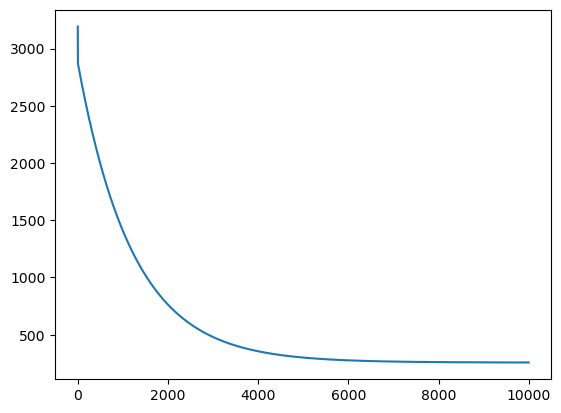

In [13]:

plt.plot(cost_hist)

In [14]:
predicted_y=prediction(X_train,w_final,b_final)
cost_total=cost(X_train, y_train, w_final, b_final)

In [15]:

print(cost_total)
print(cost_hist[-1:])  #last value of cost history array

#here last value of cost history==total-cost

257.4715340936829
[257.4715340936829]


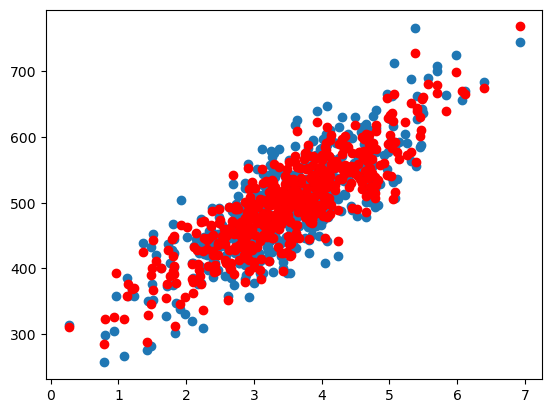

In [16]:
plt.scatter(X_train[:,3], y_train)  #column 4
plt.scatter(X_train[:,3], predicted_y, c='r')




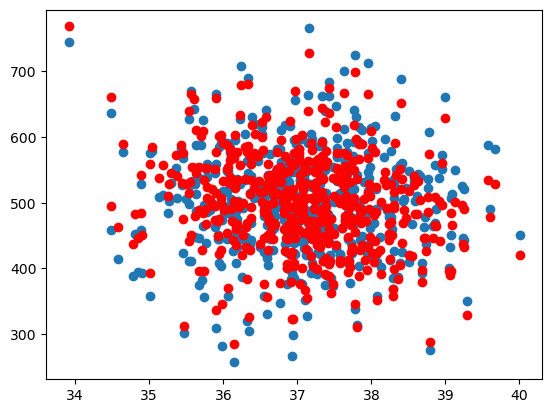

In [17]:
plt.scatter(X_train[:,2], y_train)
plt.scatter(X_train[:,2], predicted_y, c='r')


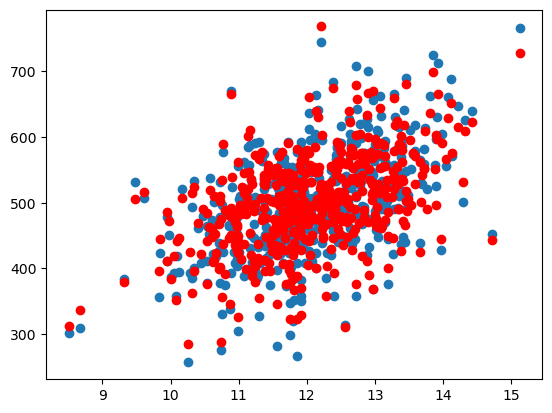

In [18]:
plt.scatter(X_train[:,1], y_train)
plt.scatter(X_train[:,1], predicted_y, c='r')

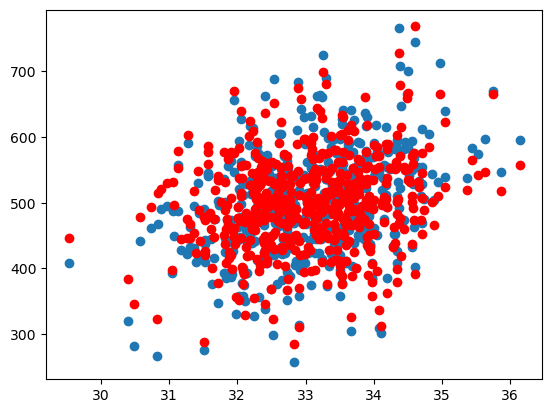

In [19]:
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_train[:,0], predicted_y, c='r')

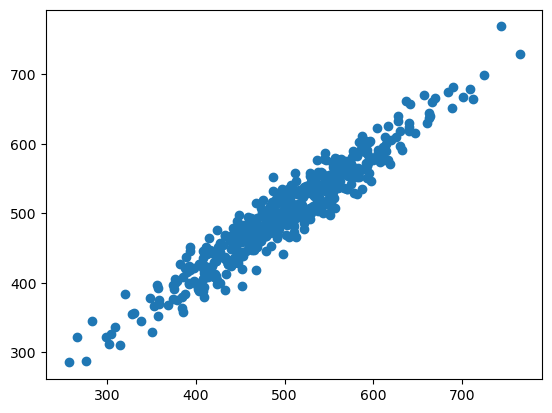

In [20]:
plt.scatter(y_train,predicted_y)

# After Normalization

# $$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \$$ 

In [26]:
def z_score_norm(X):
    mu=np.mean(X,axis=0)   #mean
    sigma=np.std(X,axis=0)  #standard deviation
    X_norm=(X-mu)/sigma
    return X_norm

X_norm=z_score_norm(X_train)
X_norm

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

In [27]:
w_norm, b_norm, cost_hist_norm=gradient_descent(X_norm, y_train, w_init,b_init, compute_gradient, cost, alpha, 10000)


In [28]:
w_norm

array([25.22345444, 37.83099791,  0.39996875, 60.50928087])

In [29]:
predicted_norm=prediction(X_norm,w_norm,b_norm)
cost_total_norm=cost(X_norm, y_train, w_norm,b_norm)

In [30]:
print(cost_total_norm)
print(cost_hist_norm[-1:])  #last value of cost history array


91.71183200327026
[91.71183200327026]


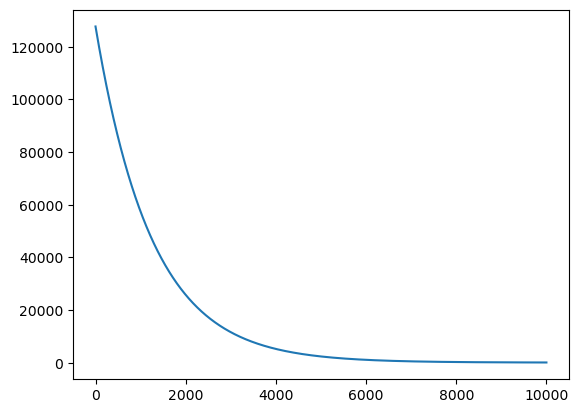

In [31]:
plt.plot(cost_hist_norm)

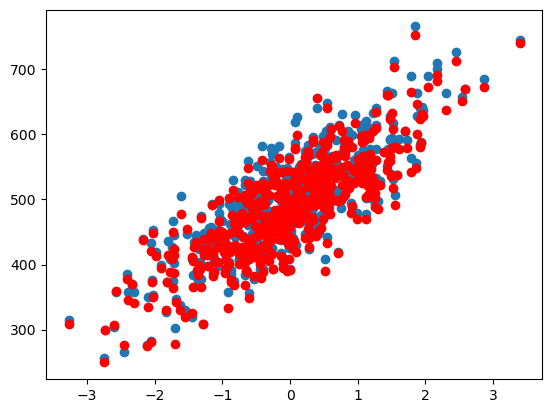

In [32]:
plt.scatter(X_norm[:,3], y_train)  #column 4
plt.scatter(X_norm[:,3], predicted_norm, c='r')




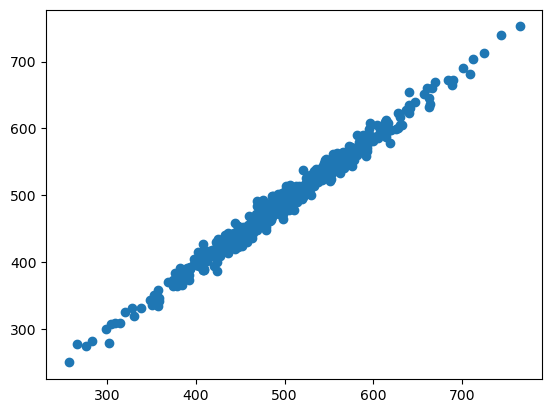

In [34]:
plt.scatter(y_train,predicted_norm)